Device set to: cuda


Preprocessing and Tokenizing Reviews: 100%|██████████| 1000/1000 [00:00<00:00, 199652.70it/s]
c:\ProgramData\anaconda3\envs\dl-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tokenization completed successfully.


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


LDA Model Training Completed.
(0, '0.006*"너무" + 0.004*"맛있게" + 0.003*"진짜" + 0.003*"거"')
(1, '0.021*"너무" + 0.007*"맛있어요" + 0.007*"정말" + 0.007*"맛있고"')
(2, '0.007*"너무" + 0.007*"좋은" + 0.005*"좋아요" + 0.005*"엄청"')
(3, '0.007*"정말" + 0.007*"맛있고" + 0.005*"또" + 0.005*"수"')
(4, '0.008*"맛있어요" + 0.008*"맛있게" + 0.008*"또" + 0.006*"너무"')
(5, '0.033*"굿" + 0.016*"너무" + 0.004*"또" + 0.004*"진짜"')
(6, '0.030*"좋아요" + 0.015*"너무" + 0.012*"잘" + 0.006*"다"')
(7, '0.013*"너무" + 0.010*"맛있고" + 0.008*"진짜" + 0.007*"넘"')
(8, '0.007*"잘" + 0.007*"너무" + 0.006*"맛있어요" + 0.003*"좋은"')
(9, '0.059*"맛있어요" + 0.026*"너무" + 0.008*"넘" + 0.007*"좋고"')
Cluster 0 top terms: 먹어본적, 먹어본맛인데여긴, 먹어봐서, 너무, 맛있고, 맛이, 친절하고, 혼밥하기, 분위기, 좋아요
Cluster 1 top terms: 진짜, 자주, 좋아요, 친절하시고, 분위기도, 맛있고, 음식도, 맛있어요, 좋고, 너무
Cluster 2 top terms: 양도, 항상, 먹었습니다, 쌀국수, 정말, 좋아요, 맛있게, 진짜, 맛있고, 맛있어요
Cluster 3 top terms: 방문했어요, 맛도, 신메뉴가, 메뉴, 계란이, 적어, 가볍게, 너무, 먹기, 좋습니다
Cluster 4 top terms: 먹어볼래요, 힙한, 쌀국수도, 분짜, 음식도, 음식, 항상, 쌀국수, 너무, 맛있어요


C:\Users\G-01\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
KoBERT

Epoch 1/3 Loss: 0.6988


KoBERT Training Epoch 2/3: 100%|██████████| 63/63 [03:21<00:00,  3.21s/it]


Epoch 2/3 Loss: 0.6970


KoBERT Training Epoch 3/3: 100%|██████████| 63/63 [03:18<00:00,  3.15s/it]


Epoch 3/3 Loss: 0.7016


KC-BERT Training Epoch 1/3: 100%|██████████| 63/63 [04:21<00:00,  4.15s/it]


Epoch 1/3 Loss: 0.7130


KC-BERT Training Epoch 2/3: 100%|██████████| 63/63 [04:16<00:00,  4.07s/it]


Epoch 2/3 Loss: 0.6739


KC-BERT Training Epoch 3/3: 100%|██████████| 63/63 [04:19<00:00,  4.13s/it]


Epoch 3/3 Loss: 0.6223


Evaluating Ensemble Model: 100%|██████████| 63/63 [03:30<00:00,  3.35s/it]


Ensemble Model - Accuracy: 0.5240, Precision: 0.5165, Recall: 0.7520, F1-Score: 0.6124


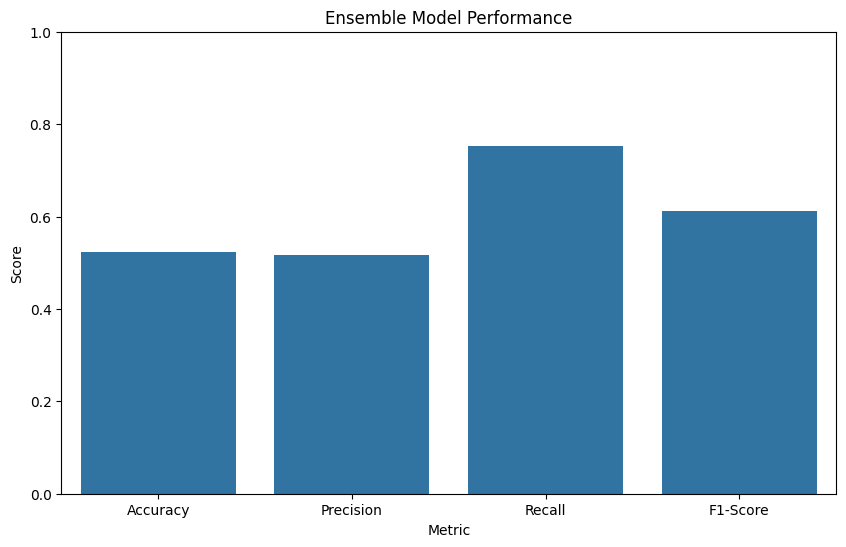

C:\Users\G-01\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Summarizing Reviews:  17%|█▋        | 21/125 [2:20:42<11:36:52, 402.04s/it]


KeyboardInterrupt: 

In [8]:
import os
import pandas as pd
import torch
import re
from tqdm import tqdm
from soynlp.tokenizer import LTokenizer
from soynlp.normalizer import repeat_normalize
from concurrent.futures import ThreadPoolExecutor, as_completed
import concurrent.futures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from transformers import BertTokenizer, BertForSequenceClassification, BartTokenizer, BartForConditionalGeneration
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CUDA 오류 발생 시 정확한 위치를 파악하기 위해 설정
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to: {device}")

# 1. 데이터 전처리 및 탐색

# 데이터셋 로드
file_path = './외국음식전문점.csv'
df = pd.read_csv(file_path)

# 결측값 처리
df['content'] = df['content'].fillna('')

# 데이터 샘플링 (빠른 테스트를 위해)
df = df.sample(1000, random_state=42)
text_data = df['content'].tolist()

# 전처리 함수 정의
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^가-힣\s]', '', text)
    text = repeat_normalize(text, num_repeats=2)
    stopwords = ['이', '그', '저', '의', '을', '를', '은', '는', '에', '와', '과', '도', '으로', '그리고', '하지만', '그래서']
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text.strip()

# 전역적으로 LTokenizer 초기화
tokenizer = LTokenizer()

# 전처리 및 토큰화 함수
def preprocess_and_tokenize(review):
    preprocessed_review = preprocess_text(review)
    tokens = tokenizer.tokenize(preprocessed_review)
    return tokens

# 병렬 처리 함수
def parallel_process(data, func, num_workers=None):
    results = []
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        future_to_data = {executor.submit(func, d): d for d in data}
        for future in tqdm(concurrent.futures.as_completed(future_to_data), total=len(data), desc="Preprocessing and Tokenizing Reviews"):
            try:
                result = future.result()
                results.append(result)
            except Exception as exc:
                print(f'Generated an exception: {exc}')
                results.append(None)
    return results

# 병렬 처리 수행
preprocessed_data = parallel_process(text_data, preprocess_and_tokenize, num_workers=4)
print("Tokenization completed successfully.")

# 2. 카테고리화 및 키워드 추출

# TF-IDF를 사용하여 리뷰 텍스트 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in preprocessed_data])

# KMeans 클러스터링을 통해 음식 종류 카테고리화
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['category'] = kmeans.fit_predict(tfidf_matrix)

# LDA 모델을 사용한 토픽 모델링
dictionary = Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

num_topics = 10
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
print("LDA Model Training Completed.")
for topic in topics:
    print(topic)

# 각 클러스터(카테고리)별 키워드 추출
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    terms = vectorizer.get_feature_names_out()
    top_terms = [terms[idx] for idx in cluster_center.argsort()[-10:]]
    print(f"Cluster {i} top terms: {', '.join(top_terms)}")

# 3. 모델 구축 및 감성 분석

# KoBERT 및 KC-BERT 모델 로드
tokenizer_kobert = BertTokenizer.from_pretrained('monologg/kobert')
model_kobert = BertForSequenceClassification.from_pretrained('monologg/kobert', num_labels=2).to(device)

tokenizer_kcbert = BertTokenizer.from_pretrained('beomi/kcbert-base')
model_kcbert = BertForSequenceClassification.from_pretrained('beomi/kcbert-base', num_labels=2).to(device)

# 감성 분석을 위한 데이터 준비
inputs_kobert = tokenizer_kobert(text_data, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)
inputs_kcbert = tokenizer_kcbert(text_data, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)

labels = torch.tensor([0, 1] * (inputs_kobert['input_ids'].size(0) // 2 + 1))[:inputs_kobert['input_ids'].size(0)].to(device)
dataset_kobert = TensorDataset(inputs_kobert['input_ids'], inputs_kobert['attention_mask'], labels)
dataset_kcbert = TensorDataset(inputs_kcbert['input_ids'], inputs_kcbert['attention_mask'], labels)

train_loader_kobert = DataLoader(dataset_kobert, batch_size=16, shuffle=True)
train_loader_kcbert = DataLoader(dataset_kcbert, batch_size=16, shuffle=True)

optimizer_kobert = torch.optim.AdamW(model_kobert.parameters(), lr=1e-5)
optimizer_kcbert = torch.optim.AdamW(model_kcbert.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# KoBERT 학습
for epoch in range(3):  # 예시로 3 에포크 설정
    model_kobert.train()
    epoch_loss = 0
    for batch in tqdm(train_loader_kobert, desc=f"KoBERT Training Epoch {epoch+1}/3"):
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer_kobert.zero_grad()
        outputs_kobert = model_kobert(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs_kobert.logits, labels)
        loss.backward()
        optimizer_kobert.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/3 Loss: {epoch_loss/len(train_loader_kobert):.4f}")

# KC-BERT 학습
for epoch in range(3):  # 예시로 3 에포크 설정
    model_kcbert.train()
    epoch_loss = 0
    for batch in tqdm(train_loader_kcbert, desc=f"KC-BERT Training Epoch {epoch+1}/3"):
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer_kcbert.zero_grad()
        outputs_kcbert = model_kcbert(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs_kcbert.logits, labels)
        loss.backward()
        optimizer_kcbert.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/3 Loss: {epoch_loss/len(train_loader_kcbert):.4f}")

# 4. 앙상블 예측
def ensemble_predict(kobert_outputs, kcbert_outputs):
    ensemble_logits = (kobert_outputs.logits + kcbert_outputs.logits) / 2
    return torch.argmax(ensemble_logits, dim=1)

# 평가 모드로 전환
model_kobert.eval()
model_kcbert.eval()

ensemble_predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(train_loader_kobert, desc="Evaluating Ensemble Model"):
        input_ids_kobert, attention_mask_kobert, labels = [x.to(device) for x in batch]
        input_ids_kcbert = input_ids_kobert
        attention_mask_kcbert = attention_mask_kobert
        
        outputs_kobert = model_kobert(input_ids_kobert, attention_mask=attention_mask_kobert)
        outputs_kcbert = model_kcbert(input_ids_kcbert, attention_mask=attention_mask_kcbert)
        
        ensemble_preds = ensemble_predict(outputs_kobert, outputs_kcbert)
        
        ensemble_predictions.extend(ensemble_preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, ensemble_predictions)
precision = precision_score(true_labels, ensemble_predictions)
recall = recall_score(true_labels, ensemble_predictions)
f1 = f1_score(true_labels, ensemble_predictions)

print(f"Ensemble Model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# 성능 결과 시각화
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.ylim(0, 1)
plt.title('Ensemble Model Performance')
plt.ylabel('Score')
plt.xlabel('Metric')

# 시각화 결과 저장
plt.savefig('ensemble_model_performance.png')
plt.show()

# 5. 리뷰 요약

# BART 모델 로드
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)

# 리뷰 요약 결과를 저장할 리스트
review_summaries = []

# 배치 크기 설정
batch_size = 8  # 배치 크기를 8로 설정하여 메모리 사용량 줄이기

bart_model.eval()
with torch.no_grad():
    for i in tqdm(range(0, len(text_data), batch_size), desc="Summarizing Reviews"):
        batch = text_data[i:i + batch_size]
        inputs = bart_tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=1024).to(device)
        
        summary_ids = bart_model.generate(
            inputs['input_ids'], 
            attention_mask=inputs['attention_mask'], 
            max_length=150, 
            min_length=40, 
            length_penalty=2.0, 
            num_beams=4, 
            early_stopping=True
        )
        summaries = bart_tokenizer.batch_decode(summary_ids, skip_special_tokens=True)
        
        for review, summary in zip(batch, summaries):
            review_summaries.append({'Original': review, 'Summary': summary})
        
        # 메모리 정리
        del inputs
        torch.cuda.empty_cache()

# 리뷰 요약 결과를 파일로 저장
review_summaries_df = pd.DataFrame(review_summaries)
review_summaries_df.to_csv('review_summaries.csv', index=False)

print("Review summaries saved to review_summaries.csv")


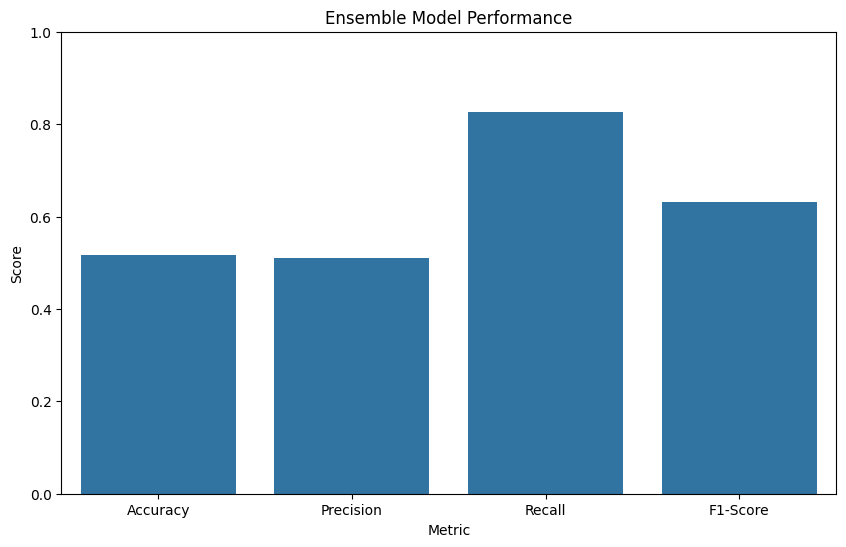

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성능 결과 시각화
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.ylim(0, 1)
plt.title('Ensemble Model Performance')
plt.ylabel('Score')
plt.xlabel('Metric')

# 시각화 결과 저장
plt.savefig('ensemble_model_performance.png')
plt.show()


In [7]:
import os
import pandas as pd
import torch
from tqdm import tqdm
from transformers import BartTokenizer, BartForConditionalGeneration

# CUDA 오류 발생 시 정확한 위치를 파악하기 위해 설정
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to: {device}")

# 데이터셋 로드
file_path = './외국음식전문점.csv'
df = pd.read_csv(file_path)

# 결측값 처리
df['content'] = df['content'].fillna('')
text_data = df['content'].tolist()

# BART 모델 로드
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)

# 리뷰 요약 결과를 저장할 리스트
review_summaries = []

# 배치 크기 설정
batch_size = 8  # 배치 크기를 8로 설정하여 메모리 사용량 줄이기

bart_model.eval()
with torch.no_grad():
    for i in tqdm(range(0, len(text_data), batch_size), desc="Summarizing Reviews"):
        batch = text_data[i:i + batch_size]
        inputs = bart_tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=1024).to(device)
        
        summary_ids = bart_model.generate(
            inputs['input_ids'], 
            attention_mask=inputs['attention_mask'], 
            max_length=150, 
            min_length=40, 
            length_penalty=2.0, 
            num_beams=4, 
            early_stopping=True
        )
        summaries = bart_tokenizer.batch_decode(summary_ids, skip_special_tokens=True)
        
        for review, summary in zip(batch, summaries):
            review_summaries.append({'Original': review, 'Summary': summary})
        
        # 메모리 정리
        del inputs
        torch.cuda.empty_cache()

# 리뷰 요약 결과를 파일로 저장
review_summaries_df = pd.DataFrame(review_summaries)
review_summaries_df.to_csv('review_summaries.csv', index=False)

print("Review summaries saved to review_summaries.csv")


Device set to: cuda


C:\Users\G-01\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Summarizing Reviews:   0%|          | 0/6665 [00:26<?, ?it/s]


KeyboardInterrupt: 